In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

In [2]:
pd.set_option(
    'display.max_rows', 100
)
url ="http://publicplansdata.org/api/"
focus_plans_list=['101', '110', '125', '179']
most_improved_list=['78','108','42','146','90']
least_improved_list=['36','107','106','35','105']
hardest_hit_list=['163','128','129','149','30']

In [3]:
#Make sure to use QDataset, NOT QDataSet.  Makes a big difference
paramsratios = {
    "q": "QDataset",
    "dataset": "pensiongasbschedules",
     "format": "json"
}
paramsbasicplandata = {
    "q": "QDataset",
    "dataset": "pensionplanbasics",
     "format": "json"
}

In [4]:
#create requests
ratiosresponse = requests.get(url, params = paramsratios)
plandataresponse = requests.get(url,params=paramsbasicplandata)

In [5]:
#create json response object
fundedratiosdata = ratiosresponse.json()
plandata = plandataresponse.json()

In [6]:
#change response object into DataFrame
funded_ratios_full = pd.DataFrame(fundedratiosdata[1:])
plan_data_full = pd.DataFrame(plandata[1:])

In [7]:
#remove rows with empty funded ratio data
funded_ratio_df=funded_ratios_full[['ppd_id','fy','ActFundedRatio_GASB','ActFundedRatio_est','PercentReqContPaid']].dropna()

In [8]:
plan_data_df=plan_data_full[['ppd_id','PlanName','StateAbbrev','PlanClosed','PlanYearClosed',]]

In [9]:
plan_test_data_df=pd.merge(funded_ratio_df,plan_data_df,how="inner",on="ppd_id")
plan_test_data_df['ActFundedRatio_GASB'] = plan_test_data_df['ActFundedRatio_GASB'].astype(float)
plan_test_data_df['PercentReqContPaid'] = plan_test_data_df['PercentReqContPaid'].astype(float)

In [10]:
focus_plans_data_df=plan_test_data_df[plan_test_data_df["ppd_id"].isin(focus_plans_list)]
mostimproved_plans_data_df=plan_test_data_df[plan_test_data_df["ppd_id"].isin(most_improved_list)]
leastimproved_plans_data_df=plan_test_data_df[plan_test_data_df["ppd_id"].isin(least_improved_list)]
hardesthit_plans_data_df=plan_test_data_df[plan_test_data_df["ppd_id"].isin(hardest_hit_list)]

In [11]:
#steady performer plot data
plan_101=plan_test_data_df[plan_test_data_df["ppd_id"]=="101"]
plan_101_fundrat=plan_101["ActFundedRatio_GASB"]
plan_101_contpaid=plan_101["PercentReqContPaid"]
plan_101_fy=plan_101["fy"]

plan_110=plan_test_data_df[plan_test_data_df["ppd_id"]=="110"]
plan_110_fundrat=plan_110["ActFundedRatio_GASB"]
plan_110_contpaid=plan_110["PercentReqContPaid"]
plan_110_fy=plan_110["fy"]

plan_125=plan_test_data_df[plan_test_data_df["ppd_id"]=="125"]
plan_125_fundrat=plan_125["ActFundedRatio_GASB"]
plan_125_contpaid=plan_125["PercentReqContPaid"]
plan_125_fy=plan_125["fy"]

plan_179=plan_test_data_df[plan_test_data_df["ppd_id"]=="179"]
plan_179_fundrat=plan_179["ActFundedRatio_GASB"]
plan_179_contpaid=plan_179["PercentReqContPaid"]
plan_179_fy=plan_179["fy"]

#most improved plot data
plan_78=plan_test_data_df[plan_test_data_df["ppd_id"]=="78"]
plan_78_fundrat=plan_78["ActFundedRatio_GASB"]
plan_78_contpaid=plan_78["PercentReqContPaid"]
plan_78_fy=plan_78["fy"]

plan_108=plan_test_data_df[plan_test_data_df["ppd_id"]=="108"]
plan_108_fundrat=plan_108["ActFundedRatio_GASB"]
plan_108_contpaid=plan_108["PercentReqContPaid"]
plan_108_fy=plan_108["fy"]

plan_42=plan_test_data_df[plan_test_data_df["ppd_id"]=="42"]
plan_42_fundrat=plan_42["ActFundedRatio_GASB"]
plan_42_contpaid=plan_42["PercentReqContPaid"]
plan_42_fy=plan_42["fy"]

plan_146=plan_test_data_df[plan_test_data_df["ppd_id"]=="146"]
plan_146_fundrat=plan_146["ActFundedRatio_GASB"]
plan_146_contpaid=plan_146["PercentReqContPaid"]
plan_146_fy=plan_146["fy"]

plan_90=plan_test_data_df[plan_test_data_df["ppd_id"]=="90"]
plan_90_fundrat=plan_90["ActFundedRatio_GASB"]
plan_90_contpaid=plan_90["PercentReqContPaid"]
plan_90_fy=plan_90["fy"]

#least improved plot data
plan_36=plan_test_data_df[plan_test_data_df["ppd_id"]=="36"]
plan_36_fundrat=plan_36["ActFundedRatio_GASB"]
plan_36_contpaid=plan_36["PercentReqContPaid"]
plan_36_fy=plan_36["fy"]

plan_107=plan_test_data_df[plan_test_data_df["ppd_id"]=="107"]
plan_107_fundrat=plan_107["ActFundedRatio_GASB"]
plan_107_contpaid=plan_107["PercentReqContPaid"]
plan_107_fy=plan_107["fy"]

plan_106=plan_test_data_df[plan_test_data_df["ppd_id"]=="106"]
plan_106_fundrat=plan_106["ActFundedRatio_GASB"]
plan_106_contpaid=plan_106["PercentReqContPaid"]
plan_106_fy=plan_106["fy"]

plan_35=plan_test_data_df[plan_test_data_df["ppd_id"]=="35"]
plan_35_fundrat=plan_35["ActFundedRatio_GASB"]
plan_35_contpaid=plan_35["PercentReqContPaid"]
plan_35_fy=plan_35["fy"]

plan_105=plan_test_data_df[plan_test_data_df["ppd_id"]=="105"]
plan_105_fundrat=plan_105["ActFundedRatio_GASB"]
plan_105_contpaid=plan_105["PercentReqContPaid"]
plan_105_fy=plan_105["fy"]

#hardest hit plot data
plan_163=plan_test_data_df[plan_test_data_df["ppd_id"]=="163"]
plan_163_fundrat=plan_163["ActFundedRatio_GASB"]
plan_163_contpaid=plan_163["PercentReqContPaid"]
plan_163_fy=plan_163["fy"]

plan_128=plan_test_data_df[plan_test_data_df["ppd_id"]=="128"]
plan_128_fundrat=plan_128["ActFundedRatio_GASB"]
plan_128_contpaid=plan_128["PercentReqContPaid"]
plan_128_fy=plan_128["fy"]

plan_129=plan_test_data_df[plan_test_data_df["ppd_id"]=="129"]
plan_129_fundrat=plan_129["ActFundedRatio_GASB"]
plan_129_contpaid=plan_129["PercentReqContPaid"]
plan_129_fy=plan_129["fy"]

plan_149=plan_test_data_df[plan_test_data_df["ppd_id"]=="149"]
plan_149_fundrat=plan_149["ActFundedRatio_GASB"]
plan_149_contpaid=plan_149["PercentReqContPaid"]
plan_149_fy=plan_149["fy"]

plan_30=plan_test_data_df[plan_test_data_df["ppd_id"]=="30"]
plan_30_fundrat=plan_30["ActFundedRatio_GASB"]
plan_30_contpaid=plan_30["PercentReqContPaid"]
plan_30_fy=plan_30["fy"]

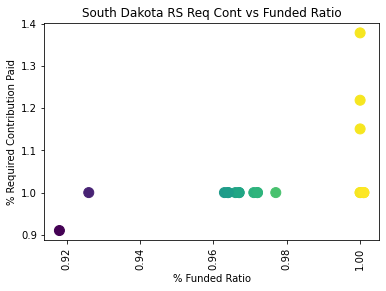

In [12]:
plt.title("South Dakota RS Req Cont vs Funded Ratio")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("% Funded Ratio")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_101_fundrat,plan_101_contpaid,c=plan_101_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_101_cont_v_fundrat.png')

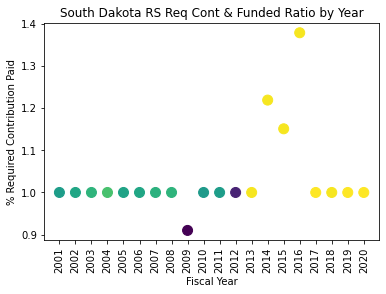

In [13]:
plt.title("South Dakota RS Req Cont & Funded Ratio by Year")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("Fiscal Year")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_101_fy,plan_101_contpaid,c=plan_101_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_101_cont_v_year.png')

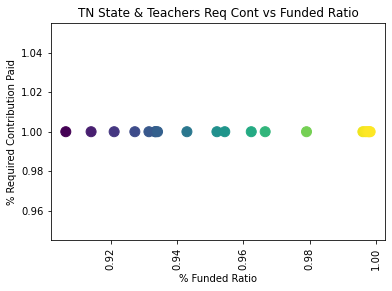

In [14]:
plt.title("TN State & Teachers Req Cont vs Funded Ratio")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("% Funded Ratio")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_110_fundrat,plan_110_contpaid,c=plan_110_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_110_cont_v_fundrat.png')

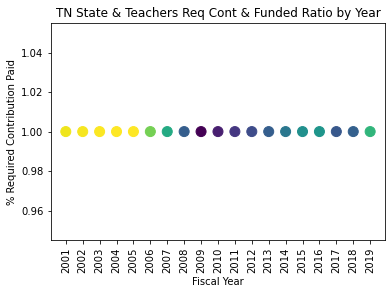

In [15]:
plt.title("TN State & Teachers Req Cont & Funded Ratio by Year")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("Fiscal Year")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_110_fy,plan_110_contpaid,c=plan_110_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_110_cont_v_year.png')

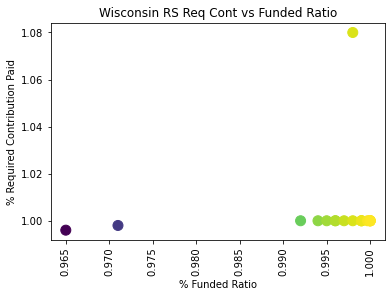

In [16]:
plt.title("Wisconsin RS Req Cont vs Funded Ratio")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("% Funded Ratio")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_125_fundrat,plan_125_contpaid,c=plan_125_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_125_cont_v_fundrat.png')

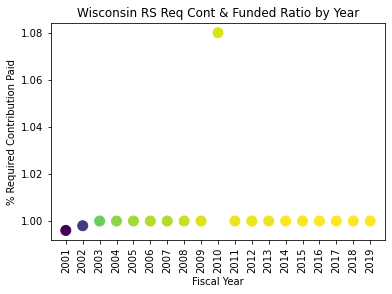

In [17]:
plt.title("Wisconsin RS Req Cont & Funded Ratio by Year")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("Fiscal Year")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_125_fy,plan_125_contpaid,c=plan_125_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_125_cont_v_year.png')

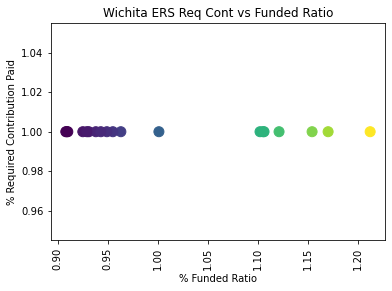

In [18]:
plt.title("Wichita ERS Req Cont vs Funded Ratio")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("% Funded Ratio")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_179_fundrat,plan_179_contpaid,c=plan_179_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_179_cont_v_fundrat.png')

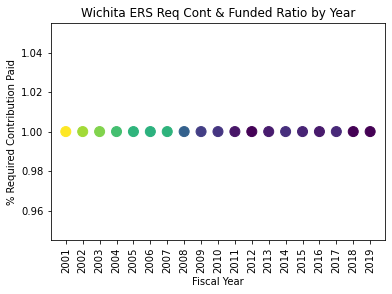

In [19]:
plt.title("Wichita ERS Req Cont & Funded Ratio by Year")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("Fiscal Year")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_179_fy,plan_179_contpaid,c=plan_179_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_179_cont_v_year.png')

In [20]:
mostimproved_plans_data_df

,ppd_id,fy,ActFundedRatio_GASB,ActFundedRatio_est,PercentReqContPaid,PlanName,StateAbbrev,PlanClosed,PlanYearClosed
808,42,2001,0.90800,0.000,1.00000,Kentucky Teachers,KY,0,None
809,42,2002,0.86600,0.000,1.00000,Kentucky Teachers,KY,0,None
810,42,2003,0.83500,0.000,1.00000,Kentucky Teachers,KY,0,None
811,42,2004,0.80900,0.000,1.00000,Kentucky Teachers,KY,0,None
812,42,2005,0.76300,0.000,0.93000,Kentucky Teachers,KY,0,None
813,42,2006,0.73100,0.000,0.87000,Kentucky Teachers,KY,0,None
814,42,2007,0.71900,0.000,0.88000,Kentucky Teachers,KY,0,None
815,42,2008,0.68200,0.000,0.83000,Kentucky Teachers,KY,0,None
816,42,2009,0.63600,0.000,0.74000,Kentucky Teachers,KY,0,None
817,42,2010,0.61000,0.000,0.76000,Kentucky Teachers,KY,0,None


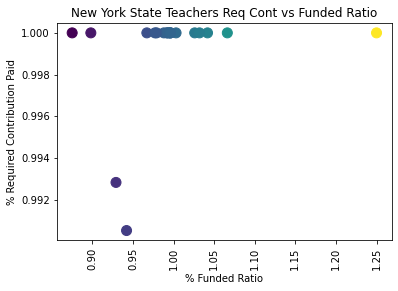

In [21]:
plt.title("New York State Teachers Req Cont vs Funded Ratio")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("% Funded Ratio")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_78_fundrat,plan_78_contpaid,c=plan_78_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_78_cont_v_fundrat.png')

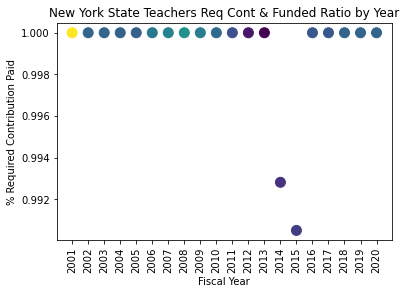

In [22]:
plt.title("New York State Teachers Req Cont & Funded Ratio by Year")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("Fiscal Year")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_78_fy,plan_78_contpaid,c=plan_78_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_78_cont_v_year.png')

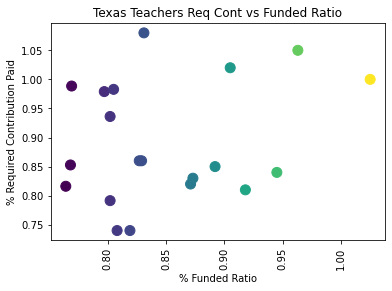

In [23]:
plt.title("Texas Teachers Req Cont vs Funded Ratio")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("% Funded Ratio")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_108_fundrat,plan_108_contpaid,c=plan_108_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_108_cont_v_fundrat.png')

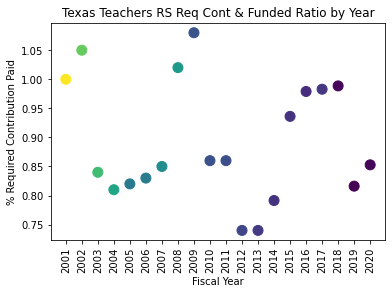

In [24]:
plt.title("Texas Teachers RS Req Cont & Funded Ratio by Year")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("Fiscal Year")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_108_fy,plan_108_contpaid,c=plan_108_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_108_cont_v_year.png')

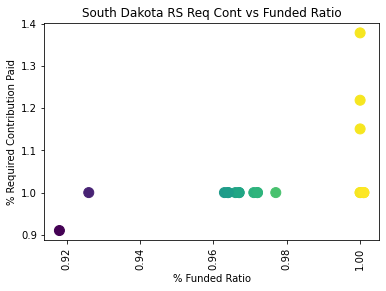

In [12]:
plt.title("Kentucky Teachers Req Cont vs Funded Ratio")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("% Funded Ratio")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_42_fundrat,plan_42_contpaid,c=plan_42_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_42_cont_v_fundrat.png')

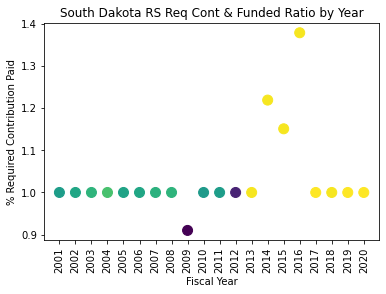

In [13]:
plt.title("Kentucky Teachers Req Cont & Funded Ratio by Year")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("Fiscal Year")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_42_fy,plan_42_contpaid,c=plan_42_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_42_cont_v_year.png')

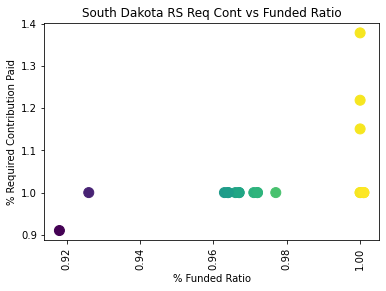

In [12]:
plt.title("Chicago Police Req Cont vs Funded Ratio")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("% Funded Ratio")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_146_fundrat,plan_146_contpaid,c=plan_146_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_146_cont_v_fundrat.png')

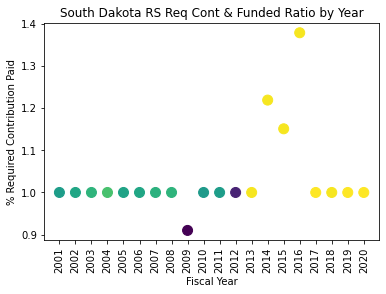

In [13]:
plt.title("Chicago Police Req Cont & Funded Ratio by Year")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("Fiscal Year")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_146_fy,plan_146_contpaid,c=plan_146_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_146_cont_v_year.png')

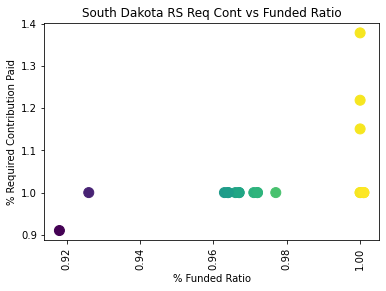

In [12]:
plt.title("Oklahoma  Req Cont vs Funded Ratio")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("% Funded Ratio")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_101_fundrat,plan_101_contpaid,c=plan_101_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_101_cont_v_fundrat.png')

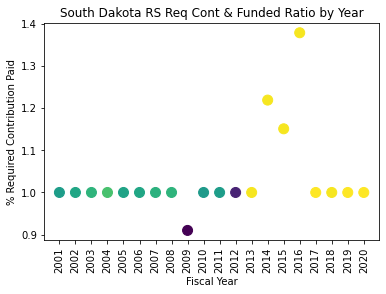

In [13]:
plt.title("South Dakota RS Req Cont & Funded Ratio by Year")
plt.ylabel("% Required Contribution Paid")
plt.xlabel("Fiscal Year")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(16,50))
plt.scatter(plan_101_fy,plan_101_contpaid,c=plan_101_fundrat, s=100)
plt.xticks(rotation=90)
plt.show
plt.savefig('plot images\plan_101_cont_v_year.png')